In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy import distance



## **Importing Data**

In [3]:
data = pd.read_csv('C:/Users/HARMEET SINGH/Downloads/Taxi-cancellation-case.csv')
target = data[['Car_Cancellation']]
data = data.drop(['Car_Cancellation'], axis=1)

In [4]:
data.head()

,row#,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,1,17712,12,NaN,2,1021.0,1323.0,NaN,NaN,1/1/13 22:33,NaN,0,0,1/1/13 8:01,13.028530,77.54625,12.869805,77.653211
1,2,17037,12,NaN,2,455.0,1330.0,NaN,NaN,1/1/13 12:43,NaN,0,0,1/1/13 9:59,12.999874,77.67812,12.953434,77.706510
2,3,761,12,NaN,2,814.0,393.0,NaN,NaN,1/2/13 0:28,1/3/13 0:00,1,0,1/1/13 12:14,12.908993,77.68890,13.199560,77.706880
3,4,868,12,NaN,2,297.0,212.0,NaN,NaN,1/1/13 13:12,NaN,0,0,1/1/13 12:42,12.997890,77.61488,12.994740,77.607970
4,5,21716,28,NaN,2,1237.0,330.0,NaN,NaN,1/1/13 16:33,NaN,0,0,1/1/13 15:07,12.926450,77.61206,12.858833,77.589127


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   row#                 10000 non-null  int64  
 1   user_id              10000 non-null  int64  
 2   vehicle_model_id     10000 non-null  int64  
 3   package_id           1752 non-null   float64
 4   travel_type_id       10000 non-null  int64  
 5   from_area_id         9985 non-null   float64
 6   to_area_id           7909 non-null   float64
 7   from_city_id         3706 non-null   float64
 8   to_city_id           339 non-null    float64
 9   from_date            10000 non-null  object 
 10  to_date              5822 non-null   object 
 11  online_booking       10000 non-null  int64  
 12  mobile_site_booking  10000 non-null  int64  
 13  booking_created      10000 non-null  object 
 14  from_lat             9985 non-null   float64
 15  from_long            9985 non-null   

In [6]:
data.nunique()

row#                   10000
user_id                 7044
vehicle_model_id          20
package_id                 7
travel_type_id             3
from_area_id             522
to_area_id               479
from_city_id               2
to_city_id                67
from_date               7976
to_date                 5332
online_booking             2
mobile_site_booking        2
booking_created         9611
from_lat                 422
from_long                419
to_lat                   390
to_long                  387
dtype: int64

In [7]:
data.shape

(10000, 18)

In [8]:
data.describe()

,row#,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long
count,10000.00000,10000.000000,10000.000000,1752.000000,10000.000000,9985.000000,7909.000000,3706.000000,339.000000,10000.000000,10000.00000,9985.000000,9985.000000,7909.000000,7909.000000
mean,5000.50000,30663.966200,26.191700,1.988014,2.141300,709.767752,665.457833,14.898003,68.318584,0.353300,0.04240,12.983301,77.636423,13.026217,77.640752
std,2886.89568,10988.599834,27.228053,1.401791,0.434917,418.968918,400.628562,1.190770,49.886427,0.478019,0.20151,0.085659,0.058667,0.113633,0.063522
min,1.00000,16.000000,1.000000,1.000000,1.000000,2.000000,6.000000,1.000000,4.000000,0.000000,0.00000,12.776630,77.386930,12.776630,77.386930
25%,2500.75000,24410.750000,12.000000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.00000,12.927320,77.594800,12.951850,77.587527
50%,5000.50000,31510.000000,12.000000,2.000000,2.000000,590.000000,516.000000,15.000000,49.000000,0.000000,0.00000,12.969368,77.635750,12.982750,77.645030
75%,7500.25000,39094.500000,24.000000,2.000000,2.000000,1086.000000,1052.000000,15.000000,108.000000,1.000000,0.00000,13.006450,77.687790,13.199560,77.706880
max,10000.00000,48729.000000,91.000000,7.000000,3.000000,1401.000000,1403.000000,15.000000,203.000000,1.000000,1.00000,13.366072,77.786420,13.366072,77.786420


## **Checking for MIssing Values**

In [9]:
print("\nMissing values per column:")
data.isnull().sum()


Missing values per column:


row#                      0
user_id                   0
vehicle_model_id          0
package_id             8248
travel_type_id            0
from_area_id             15
to_area_id             2091
from_city_id           6294
to_city_id             9661
from_date                 0
to_date                4178
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 15
from_long                15
to_lat                 2091
to_long                2091
dtype: int64

## **Data Preprocessing**

In [10]:
data=data.drop(['row#','user_id','package_id','to_area_id','from_city_id','to_city_id','to_date'],axis=1)

In [11]:
data['vehicle_model_id'].value_counts(normalize=True)*100

vehicle_model_id
12    72.79
89     5.91
85     5.72
65     4.45
28     4.06
24     3.18
87     1.16
90     0.85
23     0.75
86     0.31
10     0.25
64     0.18
54     0.16
17     0.07
91     0.07
30     0.05
36     0.01
13     0.01
70     0.01
1      0.01
Name: proportion, dtype: float64

In [12]:
data=data.drop(['vehicle_model_id'],axis=1) #Dropping as single value has more percentage

In [13]:
print(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max())
print(data['from_lat'].median())
print(data['from_long'].median())

1390.0
12.969368
77.63575


In [14]:
data[data['from_lat'] == data['from_lat'].median()].shape

(53, 10)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       10000 non-null  int64  
 1   from_area_id         9985 non-null   float64
 2   from_date            10000 non-null  object 
 3   online_booking       10000 non-null  int64  
 4   mobile_site_booking  10000 non-null  int64  
 5   booking_created      10000 non-null  object 
 6   from_lat             9985 non-null   float64
 7   from_long            9985 non-null   float64
 8   to_lat               7909 non-null   float64
 9   to_long              7909 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 781.4+ KB


In [16]:
from sklearn.impute import SimpleImputer
missing_values = data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

from_area_id      15
from_lat          15
from_long         15
to_lat          2091
to_long         2091
dtype: int64


In [17]:
columns_to_impute = ['from_lat','from_long','to_lat', 'to_long']

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])
print(data[columns_to_impute])

       from_lat  from_long     to_lat    to_long
0     13.028530  77.546250  12.869805  77.653211
1     12.999874  77.678120  12.953434  77.706510
2     12.908993  77.688900  13.199560  77.706880
3     12.997890  77.614880  12.994740  77.607970
4     12.926450  77.612060  12.858833  77.589127
...         ...        ...        ...        ...
9995  12.849482  77.663187  12.982750  77.645030
9996  13.110840  77.600740  12.982750  77.645030
9997  13.199560  77.706880  12.924710  77.498670
9998  13.051210  77.541130  13.104820  77.576310
9999  12.973553  77.621790  12.982750  77.645030

[10000 rows x 4 columns]


In [18]:
data['from_area_id'].fillna(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max(), inplace=True)

C:\Users\HARMEET SINGH\AppData\Local\Temp\ipykernel_19348\902901272.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['from_area_id'].fillna(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max(), inplace=True)


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       10000 non-null  int64  
 1   from_area_id         10000 non-null  float64
 2   from_date            10000 non-null  object 
 3   online_booking       10000 non-null  int64  
 4   mobile_site_booking  10000 non-null  int64  
 5   booking_created      10000 non-null  object 
 6   from_lat             10000 non-null  float64
 7   from_long            10000 non-null  float64
 8   to_lat               10000 non-null  float64
 9   to_long              10000 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 781.4+ KB


In [20]:
traveltype = pd.get_dummies(data['travel_type_id'],drop_first=True).astype(int)
data = pd.concat([data,traveltype],axis=1)
data = data.drop(['travel_type_id'],axis=1)
data.rename(columns={2:'traveltype_pointtopoint',3:'traveltype_hourly'},inplace=True)

In [21]:
def cal_distance(from_lat,from_long,to_lat,to_long):
    return distance.distance((from_lat,from_long),(to_lat,to_long)).km
data['distance'] = data.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)
data = data.drop(['from_lat','from_long','to_lat','to_long'],axis=1)

In [22]:
data.head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_pointtopoint,traveltype_hourly,distance
0,1021.0,1/1/13 22:33,0,0,1/1/13 8:01,1,0,21.048611
1,455.0,1/1/13 12:43,0,0,1/1/13 9:59,1,0,5.990251
2,814.0,1/2/13 0:28,1,0,1/1/13 12:14,1,0,32.204802
3,297.0,1/1/13 13:12,0,0,1/1/13 12:42,1,0,0.826682
4,1237.0,1/1/13 16:33,0,0,1/1/13 15:07,1,0,7.883644


In [23]:
data['from_date_dt'] = pd.to_datetime(data['from_date']).dt.strftime('%m/%d/%Y')
data['from_time_tm'] = pd.to_datetime(data['from_date']).dt.strftime('%H:%M')
data['booking_created_dt'] = pd.to_datetime(data['booking_created']).dt.strftime('%m/%d/%Y')
data['booking_created_tm'] = pd.to_datetime(data['booking_created']).dt.strftime('%H:%M')
data['from_date_day'] = pd.to_datetime(data['from_date_dt']).dt.day_name()
data['booking_created_day'] = pd.to_datetime(data['booking_created_dt']).dt.day_name()
data['from_date_month'] = pd.to_datetime(data['from_date_dt']).dt.month_name()
data['booking_created_month'] = pd.to_datetime(data['booking_created_dt']).dt.month_name()
data['from_date_week'] = np.where((data['from_date_day']=='Saturday') | (data['from_date_day']=='Sunday'),'Weekend','Weekday')
data['booking_created_week'] = np.where((data['booking_created_day']=='Saturday') | (data['booking_created_day']=='Sunday'),'Weekend','Weekday')

C:\Users\HARMEET SINGH\AppData\Local\Temp\ipykernel_19348\1059535030.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['from_date_dt'] = pd.to_datetime(data['from_date']).dt.strftime('%m/%d/%Y')
C:\Users\HARMEET SINGH\AppData\Local\Temp\ipykernel_19348\1059535030.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['from_time_tm'] = pd.to_datetime(data['from_date']).dt.strftime('%H:%M')
C:\Users\HARMEET SINGH\AppData\Local\Temp\ipykernel_19348\1059535030.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['booking_created_dt'] = pd.to_datetime(data['booking_

In [24]:
cond = [(pd.to_datetime(data['from_time_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['from_time_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['from_time_tm']).dt.hour==0)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['from_date_session'] = np.select(cond,values, default = 'Unknown')

C:\Users\HARMEET SINGH\AppData\Local\Temp\ipykernel_19348\2208786317.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cond = [(pd.to_datetime(data['from_time_tm']).dt.hour.between(5, 8)),
C:\Users\HARMEET SINGH\AppData\Local\Temp\ipykernel_19348\2208786317.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  (pd.to_datetime(data['from_time_tm']).dt.hour.between(9, 12)),
C:\Users\HARMEET SINGH\AppData\Local\Temp\ipykernel_19348\2208786317.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  (pd.to_datetime(data['from_time_tm']).dt.hour.between(13, 16)),
C:\Users\HARMEET SIN

In [25]:
cond = [(pd.to_datetime(data['booking_created_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['booking_created_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['booking_created_tm']).dt.hour==0)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['booking_created_session'] = np.select(cond,values, default = "Unknown")
data['time_diff'] = (pd.to_datetime(data['from_date']) - pd.to_datetime(data['booking_created'])).dt.total_seconds() / 60

C:\Users\HARMEET SINGH\AppData\Local\Temp\ipykernel_19348\215658760.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cond = [(pd.to_datetime(data['booking_created_tm']).dt.hour.between(5, 8)),
C:\Users\HARMEET SINGH\AppData\Local\Temp\ipykernel_19348\215658760.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  (pd.to_datetime(data['booking_created_tm']).dt.hour.between(9, 12)),
C:\Users\HARMEET SINGH\AppData\Local\Temp\ipykernel_19348\215658760.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  (pd.to_datetime(data['booking_created_tm']).dt.hour.between(13, 16)),
C:\Us

In [26]:
data = data.drop(['from_date','booking_created'],axis=1)
data = data.drop(['from_date_dt','from_time_tm','booking_created_dt','booking_created_tm'],axis=1)
data_merged = pd.concat([data,target],axis=1,join='inner')
data_merged

,from_area_id,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff,Car_Cancellation
0,1021.0,0,0,1,0,21.048611,Tuesday,Tuesday,January,January,Weekday,Weekday,Night,Early Morning,872.0,0
1,455.0,0,0,1,0,5.990251,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Morning,164.0,0
2,814.0,1,0,1,0,32.204802,Wednesday,Tuesday,January,January,Weekday,Weekday,Night,Morning,734.0,0
3,297.0,0,0,1,0,0.826682,Tuesday,Tuesday,January,January,Weekday,Weekday,Afternoon,Morning,30.0,0
4,1237.0,0,0,1,0,7.883644,Tuesday,Tuesday,January,January,Weekday,Weekday,Afternoon,Afternoon,86.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,293.0,0,0,0,1,14.874497,Sunday,Saturday,May,May,Weekend,Weekend,Early Morning,Evening,784.0,1
9996,1017.0,1,0,0,1,14.962832,Monday,Saturday,September,August,Weekday,Weekend,Afternoon,Early Morning,3139.0,0
9997,393.0,0,0,1,0,37.875141,Friday,Wednesday,February,January,Weekday,Weekday,Late Night,Evening,1903.0,0
9998,410.0,0,0,1,0,7.052127,Wednesday,Friday,June,June,Weekday,Weekday,Afternoon,Morning,7424.0,0


In [27]:
data['from_area_id'] = round(data_merged.groupby('from_area_id')['Car_Cancellation'].sum()/data_merged.groupby('from_area_id')['Car_Cancellation'].count(),2)
data['from_area_id'].replace(np.nan,0,inplace=True)
cond = [(data['from_area_id'].astype('float').between(0,0.33)),
        (data['from_area_id'].astype('float').between(0.34,0.66)),
        (data['from_area_id'].astype('float').between(0.67,1.0))]
values = ['Low Cancellation','Medium Cancellation','High Cancellation']
data['from_area_id'] = np.select(cond,values, default = "Unknown")

C:\Users\HARMEET SINGH\AppData\Local\Temp\ipykernel_19348\2132571773.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['from_area_id'].replace(np.nan,0,inplace=True)


In [28]:
data.head()

,from_area_id,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,Low Cancellation,0,0,1,0,21.048611,Tuesday,Tuesday,January,January,Weekday,Weekday,Night,Early Morning,872.0
1,Low Cancellation,0,0,1,0,5.990251,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Morning,164.0
2,Low Cancellation,1,0,1,0,32.204802,Wednesday,Tuesday,January,January,Weekday,Weekday,Night,Morning,734.0
3,Low Cancellation,0,0,1,0,0.826682,Tuesday,Tuesday,January,January,Weekday,Weekday,Afternoon,Morning,30.0
4,Low Cancellation,0,0,1,0,7.883644,Tuesday,Tuesday,January,January,Weekday,Weekday,Afternoon,Afternoon,86.0


## **Exploratory Data Anlysis**

In [29]:
data['from_area_id'].value_counts()

from_area_id
Low Cancellation       9966
Medium Cancellation      22
High Cancellation        12
Name: count, dtype: int64

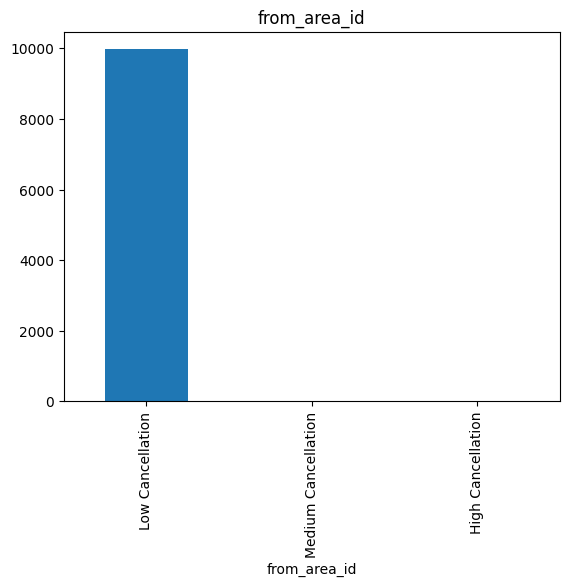

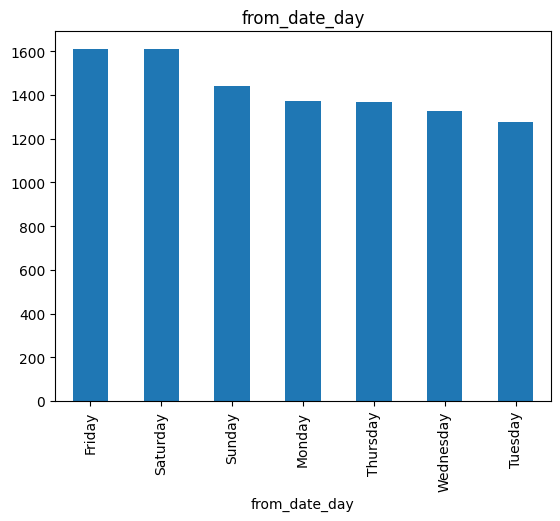

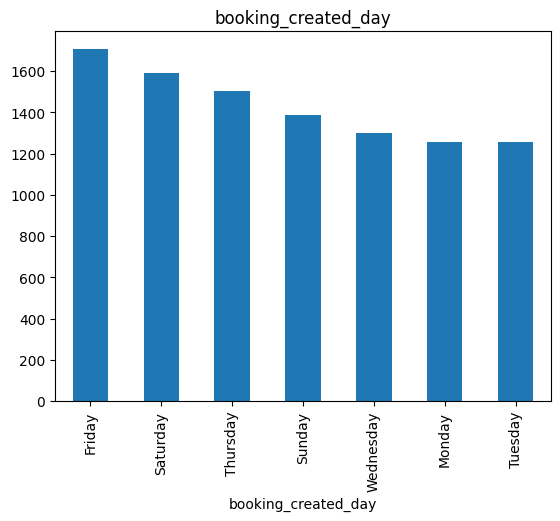

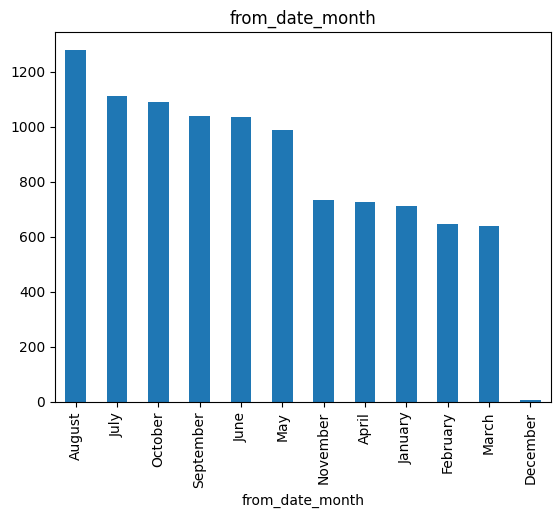

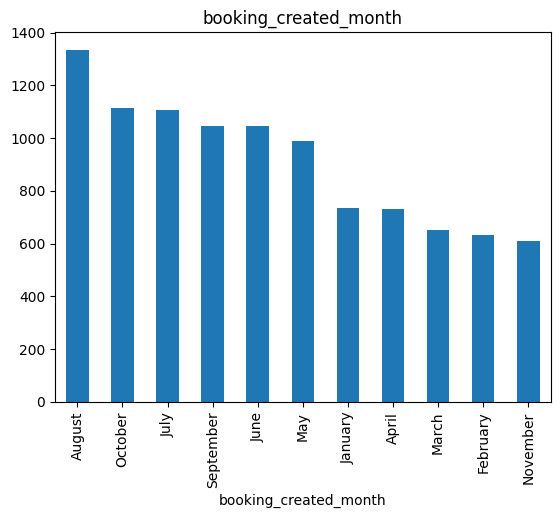

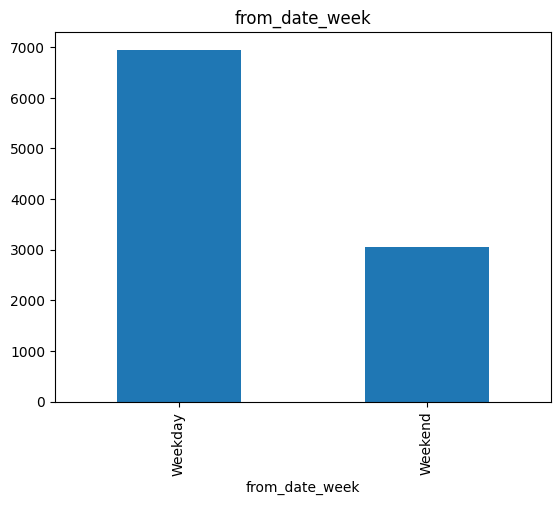

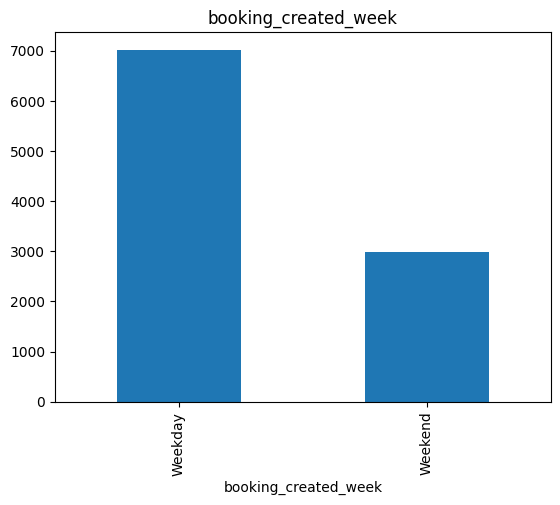

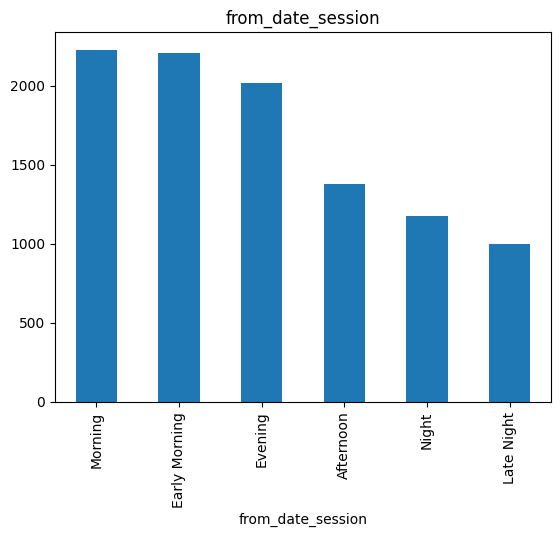

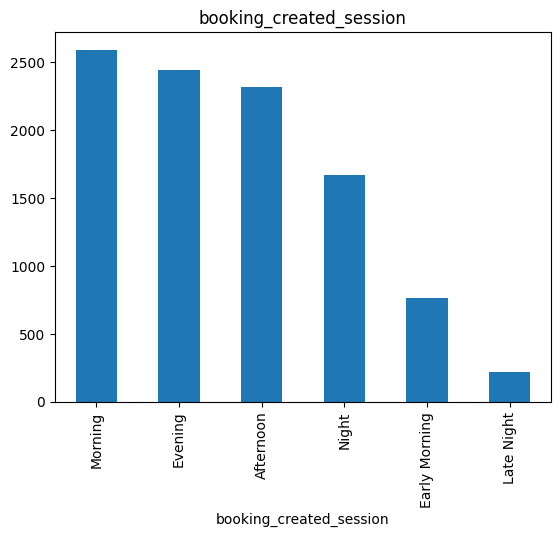

In [30]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].value_counts().plot.bar()
        plt.title(col)
        plt.show()

In [31]:
num = data.select_dtypes(include='number')
char = data.select_dtypes(include='object')
num.head()

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff
0,0,0,1,0,21.048611,872.0
1,0,0,1,0,5.990251,164.0
2,1,0,1,0,32.204802,734.0
3,0,0,1,0,0.826682,30.0
4,0,0,1,0,7.883644,86.0


In [32]:
char.head()

,from_area_id,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
0,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Night,Early Morning
1,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Morning
2,Low Cancellation,Wednesday,Tuesday,January,January,Weekday,Weekday,Night,Morning
3,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Afternoon,Morning
4,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Afternoon,Afternoon


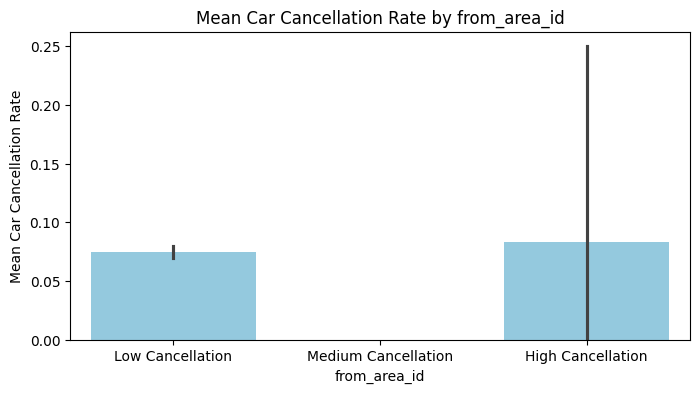

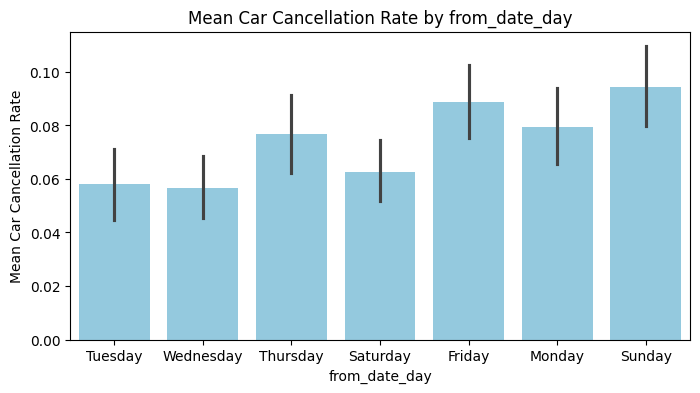

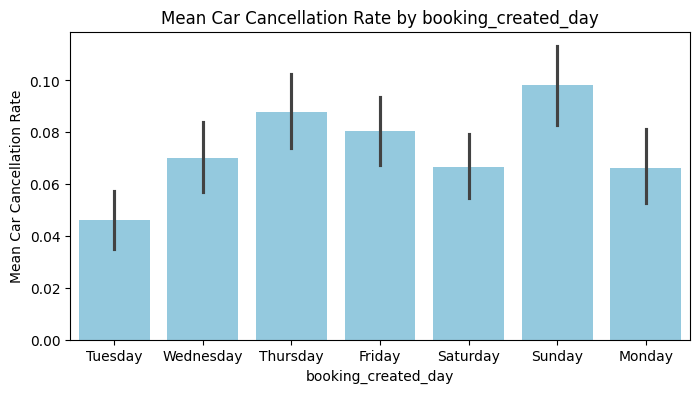

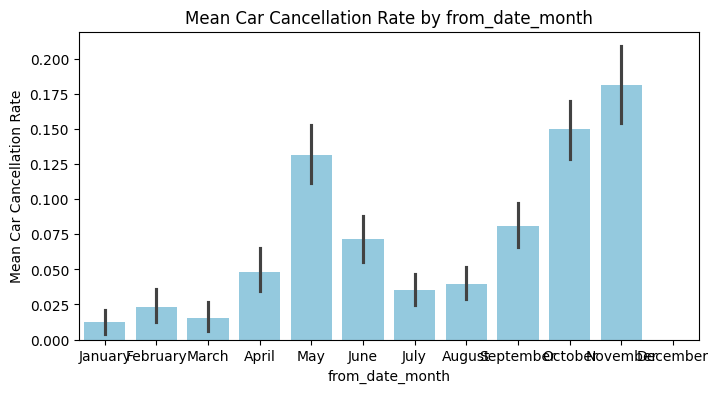

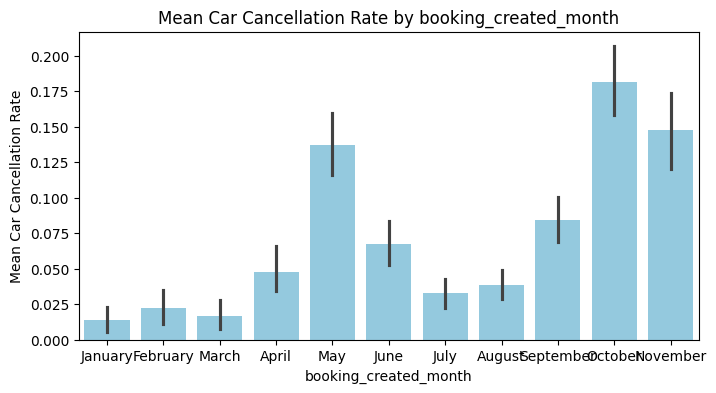

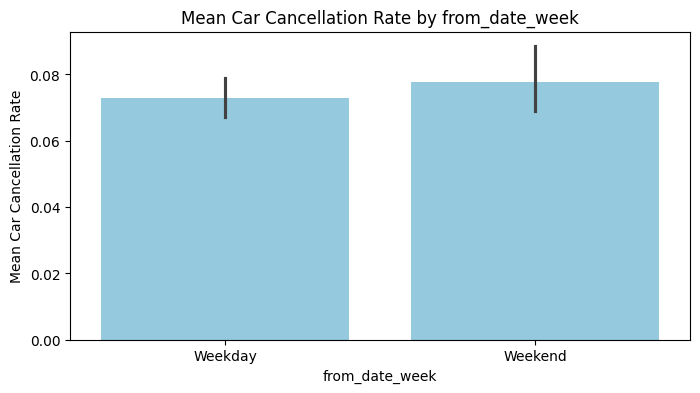

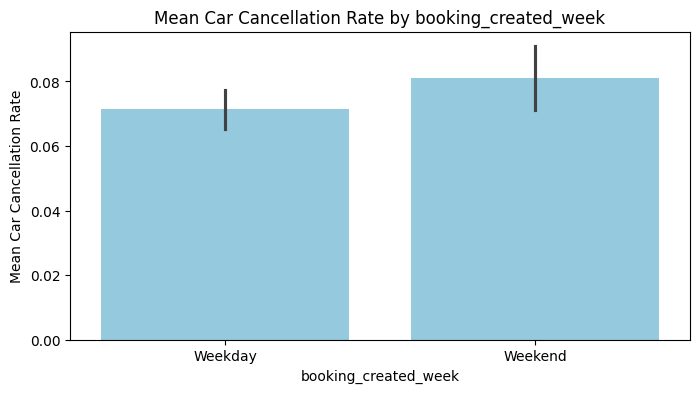

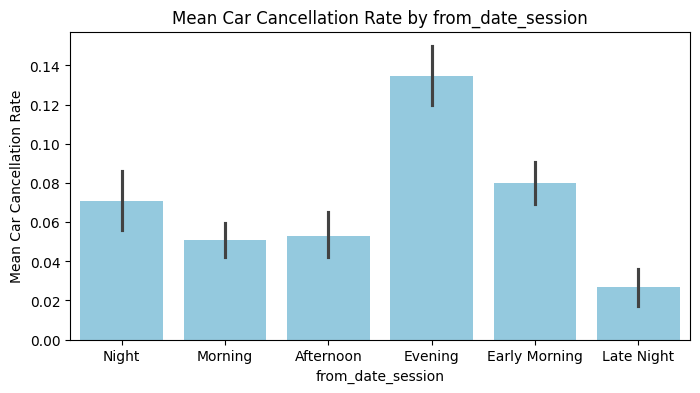

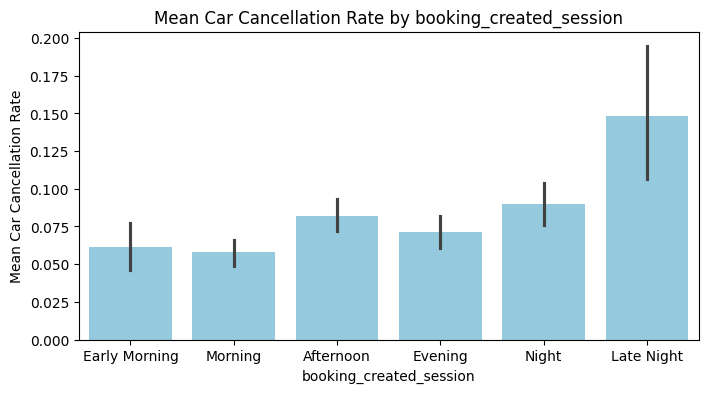

In [33]:
from numpy import mean

X_char_merged = pd.concat([char, target], axis=1, join='inner')
for col in char.columns:
    plt.figure(figsize=(8,4))
    sns.barplot(x=col, y='Car_Cancellation', data=X_char_merged, estimator=mean, color='skyblue')
    plt.title(f"Mean Car Cancellation Rate by {col}", fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Mean Car Cancellation Rate', fontsize=10)
    plt.show()

In [34]:
X_char_dum = pd.get_dummies(char, drop_first = True).astype(int)
X_char_dum.shape

(10000, 47)

In [35]:
X_char_dum.head()

,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data_final = pd.concat([num,X_char_dum],axis=1,join='inner')
data_final.head()

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,0,0,1,0,21.048611,872.0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,1,0,5.990251,164.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,1,0,32.204802,734.0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0.826682,30.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,7.883644,86.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Predictive Model** 

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_final,target,test_size=0.2,random_state=1)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel = 'rbf', probability = True, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\HARMEET SINGH\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1857    3]
 [ 135    5]]


0.931

In [40]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\HARMEET SINGH\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HARMEET SINGH\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HARMEET SINGH\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HARMEET SINGH\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Accuracy: 92.66 %
Standard Deviation: 0.22 %


In [41]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

C:\Users\HARMEET SINGH\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Accuracy: 92.85 %
Best Parameters: {'C': 0.75, 'gamma': 0.1, 'kernel': 'rbf'}


In [42]:
classifier = SVC(C = 0.75, gamma= 0.1, kernel= 'rbf', random_state = 0, probability = True)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\HARMEET SINGH\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1851    9]
 [ 126   14]]


0.9325

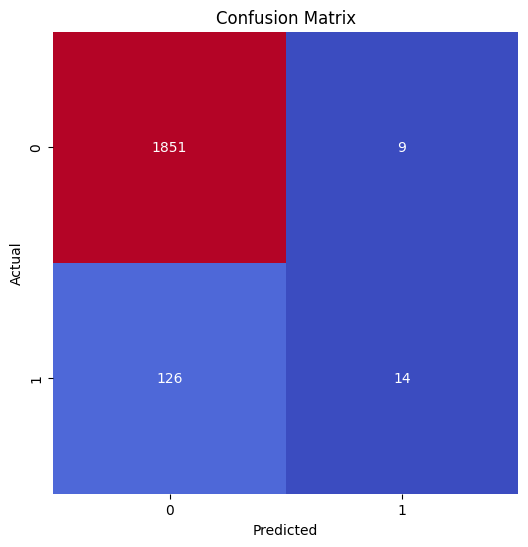

In [43]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

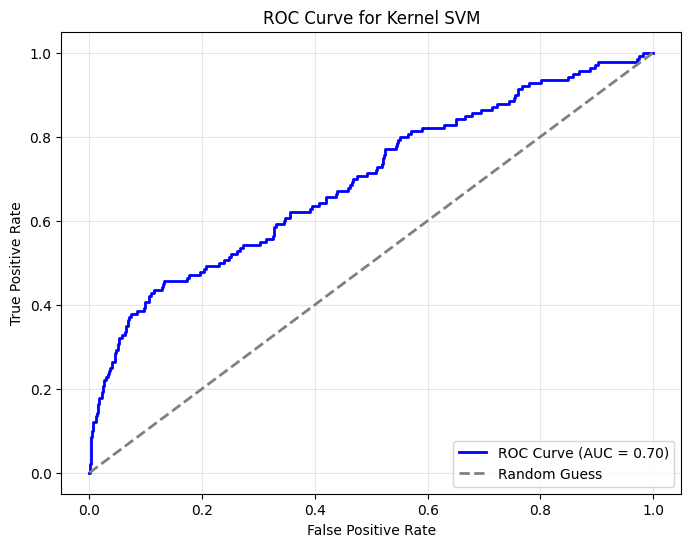

In [44]:
from sklearn.metrics import roc_curve, auc
prob = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Kernel SVM')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier_2 = DecisionTreeClassifier(criterion='gini',random_state=0)
classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [46]:
y_pred = classifier_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1717  143]
 [ 100   40]]


0.8785

In [47]:
accuracies = cross_val_score(estimator = classifier_2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.39 %
Standard Deviation: 0.70 %


In [48]:
parameters = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
grid_search = GridSearchCV(estimator = classifier_2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 92.59 %
Best Parameters: {'max_depth': 5, 'min_samples_split': 250}


In [49]:
classifier_2 = DecisionTreeClassifier(criterion='gini', max_depth = 5, min_samples_split = 250, random_state=0)
classifier_2.fit(X_train, y_train)
y_pred = classifier_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1856    4]
 [ 133    7]]


0.9315

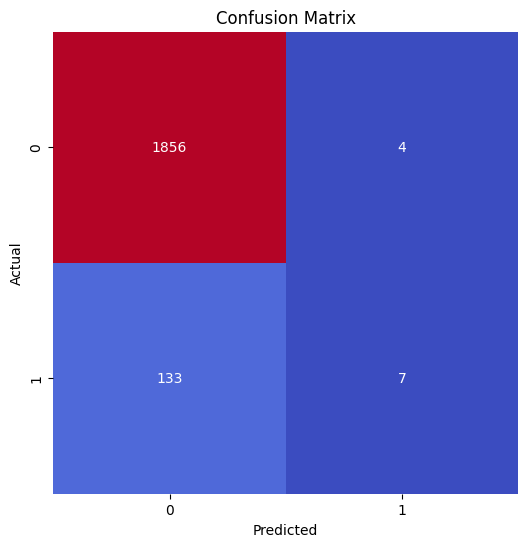

In [50]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

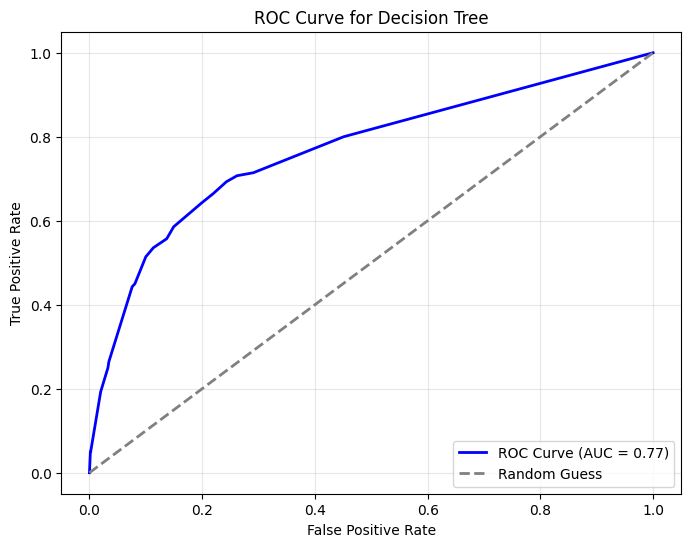

In [51]:
prob = classifier_2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()